# Affine Transforms using InBuilt Functions

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def image_translation(floating_shear_value, RADIAN_ANGLE, SCALE_x_y):
    image_1 = cv.imread("image_1.jpg", cv.IMREAD_COLOR)
    
    if image_1 is None:
        print("Error: Could not load image_1.jpg. Check the file path and integrity.")
        return None, None, None

    rows, cols, _ = image_1.shape
    
    # Shear
    shear_factor = floating_shear_value
    M_shear = np.float32([[1, shear_factor, 0],
                          [0, 1, 0]])
    shear_image = cv.warpAffine(image_1, M_shear, (cols, rows))

    # Rotate
    angle = RADIAN_ANGLE
    M_rotate = cv.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv.warpAffine(image_1, M_rotate, (cols, rows))
    
    # Scale
    scale_factor_x = SCALE_x_y[0]
    scale_factor_y = SCALE_x_y[1]
    M_scale = np.float32([[scale_factor_x, 0, 0],
                          [0, scale_factor_y, 0]])
    scaled_image = cv.warpAffine(image_1, M_scale, (cols, rows))
    
    # Convert BGR to RGB for displaying
    shear_image_rgb = cv.cvtColor(shear_image, cv.COLOR_BGR2RGB)
    rotated_image_rgb = cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB)
    scaled_image_rgb = cv.cvtColor(scaled_image, cv.COLOR_BGR2RGB)
    
    return shear_image_rgb, rotated_image_rgb, scaled_image_rgb

shear_image, rotated_image, scaled_image = image_translation(0.3, 45, [1.2, 1.2])

# Plotting Outputs using Plotting Library


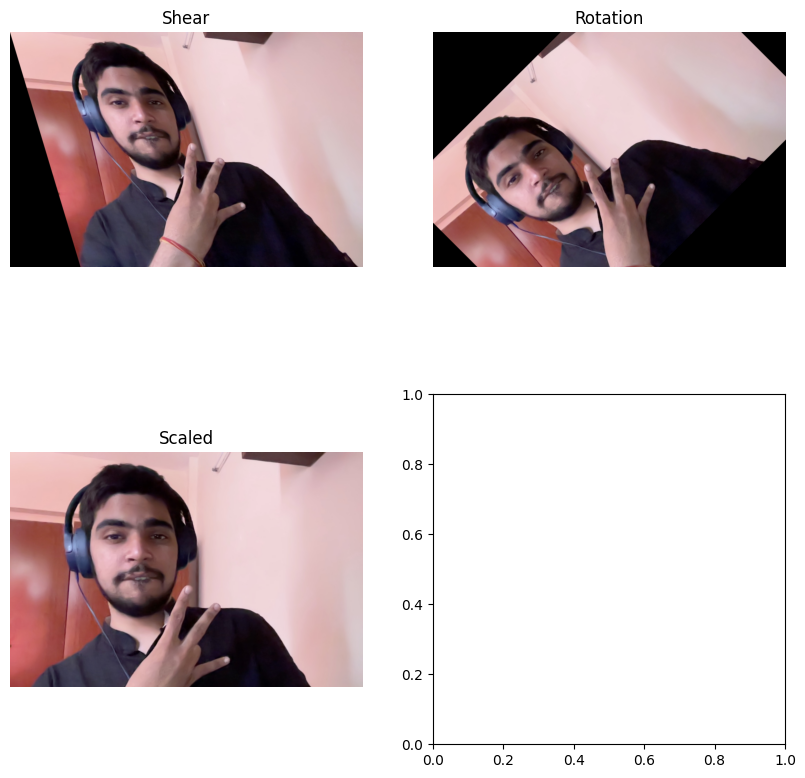

In [2]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(shear_image)
axs[0, 0].set_title('Shear')
axs[0, 0].axis('off')

axs[0, 1].imshow(rotated_image)
axs[0, 1].set_title('Rotation')
axs[0, 1].axis('off')

axs[1, 0].imshow(scaled_image)
axs[1, 0].set_title('Scaled')
axs[1, 0].axis('off')

plt.show()
